In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# # Using ipynb import functions defined in other nb
# sys.path.append("myfun/")
# from ipynb.fs.defs.myfun_load_dataset import *
# from ipynb.fs.full.myfun_models import *
# from ipynb.fs.full.myfun_nn import *
# from ipynb.fs.defs.myfun_plot import *

2023-09-07 18:49:02.849987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-07_17-28-26_df1-2-3_1it
2023-09-07_18-41-29_df8-9_5it


In [3]:
last = sorted(os.listdir(target_dir))[-1]
last

'2023-09-07_18-41-29_df8-9_5it'

### Load the df

In [4]:
path = target_dir + last
namefile = '/info_dataset.txt'
colnames = ['t_list', 'x_list', 'v_list', 'v0_scn', 'v0_scn_mean', 'n_scn', 'N. file', 'iter', 'DOE', 'processed']

In [5]:
path

'./out/2023-09-07_18-41-29_df8-9_5it'

In [6]:
info_dataset = pd.read_csv(path + namefile, sep=',', usecols= colnames)

In [7]:
NUM_ITER = int(last.split("_")[-1].split("it")[0])

## Plot

In [18]:
info_dataset.groupby(['DOE'])

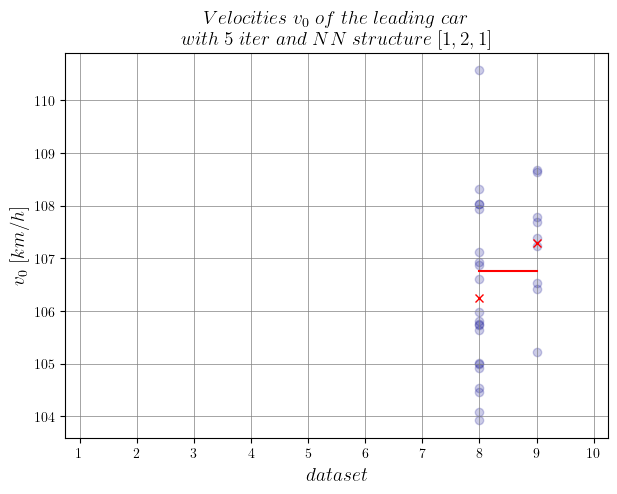

In [19]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

for _, scn in info_dataset.iterrows():

    # Convert velocities to km/h
    v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

    # For each scene, plot v0 mean (averagin over iterations)
    ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

# For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
for nf, p in info_grouped.iterrows():
    ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

# Plot v0 mean over all dfs
alldfs = [a for a, _ in info_grouped.iterrows()]
v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
               "\n"  # Newline: the backslash is interpreted as usual
             fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(info_dataset['DOE'][0])}$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()